In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('Resources/GSPC.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
df['Return'] = df.Close.pct_change() * 100
df['Lagged_Return'] = df.Return.shift()
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000,-0.050801,1.495233
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000,0.746333,-0.050801
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000,-0.639912,0.746333
1997-01-09,748.409973,757.679993,748.409973,754.849976,754.849976,555370000,0.860491,-0.639912
1997-01-10,754.849976,759.650024,746.919983,759.500000,759.500000,545850000,0.616020,0.860491


In [5]:
# to_period("w") splits the series into weekly increments
df.index.to_period("w")

PeriodIndex(['1997-01-06/1997-01-12', '1997-01-06/1997-01-12',
             '1997-01-06/1997-01-12', '1997-01-06/1997-01-12',
             '1997-01-06/1997-01-12', '1997-01-13/1997-01-19',
             '1997-01-13/1997-01-19', '1997-01-13/1997-01-19',
             '1997-01-13/1997-01-19', '1997-01-13/1997-01-19',
             ...
             '2013-12-16/2013-12-22', '2013-12-16/2013-12-22',
             '2013-12-16/2013-12-22', '2013-12-16/2013-12-22',
             '2013-12-23/2013-12-29', '2013-12-23/2013-12-29',
             '2013-12-23/2013-12-29', '2013-12-23/2013-12-29',
             '2013-12-30/2014-01-05', '2013-12-30/2014-01-05'],
            dtype='period[W-SUN]', name='Date', length=4276, freq='W-SUN')

In [6]:
# construct a list of all Pandas weekly periods that are in the dataset:
weeks = df.index.to_period("w").unique()
weeks

PeriodIndex(['1997-01-06/1997-01-12', '1997-01-13/1997-01-19',
             '1997-01-20/1997-01-26', '1997-01-27/1997-02-02',
             '1997-02-03/1997-02-09', '1997-02-10/1997-02-16',
             '1997-02-17/1997-02-23', '1997-02-24/1997-03-02',
             '1997-03-03/1997-03-09', '1997-03-10/1997-03-16',
             ...
             '2013-10-28/2013-11-03', '2013-11-04/2013-11-10',
             '2013-11-11/2013-11-17', '2013-11-18/2013-11-24',
             '2013-11-25/2013-12-01', '2013-12-02/2013-12-08',
             '2013-12-09/2013-12-15', '2013-12-16/2013-12-22',
             '2013-12-23/2013-12-29', '2013-12-30/2014-01-05'],
            dtype='period[W-SUN]', name='Date', length=887, freq='W-SUN')

### Time Calculations

The following example shows the calculations for the first training period and the first testing period

In [7]:
# Training Window (26 weeks)
training_window = 26

In [9]:
def format_datetime(val):
    return val.strftime(format="%Y-%m-%d")

In [10]:
# Beginning of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")
start_of_training_period

'1997-01-06'

In [11]:
# End of training window
end_of_training_period = weeks[training_window + 0].start_time.strftime(format="%Y-%m-%d")
end_of_training_period

'1997-07-07'

In [12]:
# The week of the first test window
test_week = weeks[training_window + 0 + 1]
test_week

Period('1997-07-14/1997-07-20', 'W-SUN')

In [13]:
# The first day of the test week
start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
start_of_test_week

'1997-07-14'

In [14]:
# The last day of the test week
end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
end_of_test_week

'1997-07-20'

In [15]:
# Training data with just one window
train = df[start_of_training_period:end_of_training_period]
train

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
1997-01-06,748.030029,753.309998,743.820007,747.650024,747.650024,531350000,-0.050801,1.495233
1997-01-07,747.650024,753.260010,742.179993,753.229980,753.229980,538220000,0.746333,-0.050801
1997-01-08,753.229980,755.719971,747.710022,748.409973,748.409973,557510000,-0.639912,0.746333
1997-01-09,748.409973,757.679993,748.409973,754.849976,754.849976,555370000,0.860491,-0.639912
1997-01-10,754.849976,759.650024,746.919983,759.500000,759.500000,545850000,0.616020,0.860491
...,...,...,...,...,...,...,...,...
1997-06-30,887.299988,892.619995,879.820007,885.140015,885.140015,561540000,-0.243432,0.409650
1997-07-01,885.140015,893.880005,884.539978,891.030029,891.030029,544190000,0.665433,-0.243432
1997-07-02,891.030029,904.049988,891.030029,904.030029,904.030029,526970000,1.458986,0.665433


In [16]:
# Testing data with just one window
test = df[start_of_test_week:end_of_test_week]
test

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
1997-07-14,916.679993,921.780029,912.020020,918.380005,918.380005,485960000,0.185453,0.317359
1997-07-15,918.380005,926.150024,914.520020,925.760010,925.760010,598370000,0.803589,0.185453
1997-07-16,925.760010,939.320007,925.760010,936.590027,936.590027,647390000,1.169851,0.803589
1997-07-17,936.590027,936.960022,927.900024,931.609985,931.609985,629250000,-0.531721,1.169851
1997-07-18,931.609985,931.609985,912.900024,915.299988,915.299988,589710000,-1.750732,-0.531721


### Putting it all together

In [17]:
# Set the training window as 26 weeks
# Total timeframe is 287 weeks
training_window = 26
timeframe = len(weeks) - training_window - 1
timeframe

860

In [18]:
# Construct an empty placeholder DataFrame, with a column named "Out-of-Sample Predictions"
# (Each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_predictions

,Out-of-Sample Predictions


In [19]:
# Construct a separate empty DataFrame for actual data
all_actuals = pd.DataFrame(columns=["Actual Returns"])
all_actuals

,Actual Returns


In [20]:
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window+i+1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df[start_of_training_period:end_of_training_period]
    test = df[start_of_test_week:end_of_test_week]
    
    # Create new DataFrames:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]
    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # Create a temporary DataFrame to hold predictions
    predictions = pd.DataFrame(predictions, index=X_test.index, columns=["Out-of-Sample Predictions"])
    # Create a temporary DataFrame of the actual "y"s in the test DataFrame, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    # Append these two DataFrames (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [21]:
# Once the loop is done, concatenate (combine) the two DataFrames to a final "Results" DataFrame:    
Results = pd.concat([all_actuals, all_predictions], axis=1)
Results.head()

,Actual Returns,Out-of-Sample Predictions
1997-07-14,0.185453,0.168602
1997-07-15,0.803589,0.160869
1997-07-16,1.169851,0.197109
1997-07-17,-0.531721,0.218581
1997-07-18,-1.750732,0.118824


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

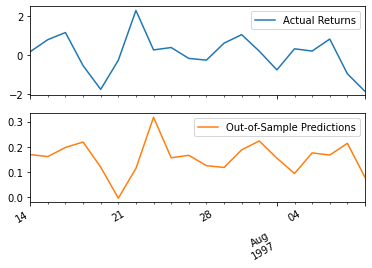

In [22]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)

### RMSE for Out-of-sample Predictions

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(
    Results["Actual Returns"],
    Results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 1.3084028845426936
